# Explore additional metadata info

Provides code for loading in additional metadata files. You can use this as a starting point to explore, analyze, visualize other measurements in the dataset. 

Check out the files for additional information about the column values.

### Setup drive

Run the following cell to mount your Drive onto Colab. Go to the given URL and once you login and copy and paste the authorization code, you should see "drive" pop up in the files tab on the left.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Click the little triangle next to "drive" and navigate to the "AI4All Chest X-Ray Project" folder. Hover over the folder and click the 3 dots that appear on the right. Select "copy path" and replace `PASTE PATH HERE` with the path to your folder.

In [ ]:
cd "/content/drive/My Drive/AI4All Project/AI4All Chest X-Ray Project"

/content/drive/My Drive/AI4All Project/AI4All Chest X-Ray Project


### Import necessary libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn import naive_bayes

### Setup paths

In [ ]:
# setup paths
path_to_dataset = os.path.join('data')
path_to_docs = os.path.join('docs')


### Load metadata

In [ ]:
# load training data metadata
metadata = pd.read_csv(os.path.join(path_to_dataset, 'metadata_train.csv'))

# load additional metadata
cohen_all = pd.read_csv(os.path.join(path_to_docs, 'metadata_cohen_all.csv'))

cohen_nofind = pd.read_csv(os.path.join(path_to_docs, 'metadata_cohen_nofind.csv'))
cohen_covid = pd.read_csv(os.path.join(path_to_docs, 'metadata_cohen_covid.csv'))

cohen_metadata = pd.concat([cohen_covid, cohen_nofind])

cohen_severity = pd.read_csv(os.path.join(path_to_docs, 'cohen_severity_scores.csv'), skiprows=5)
stanford_metadata = pd.read_csv(os.path.join(path_to_docs, 'metadata_stanford_nofind.csv'))
stanford_all = pd.read_csv(os.path.join(path_to_docs, 'metadata_stanford_all.csv'))

cohen_predictions = pd.read_csv(os.path.join(path_to_docs, 'covid_predictions.csv'))

In [ ]:
# predict with sklearn functions (e.g. GaussianNB)

# get features
df_subset = cohen_metadata[['went_icu', 'in_icu', 'survival']]
df_subset = df_subset.dropna()

df_subset['went_icu'] = df_subset['went_icu'] == 'Y'
df_subset['in_icu'] = df_subset['in_icu'] == 'Y'
df_subset

,went_icu,in_icu,survival
0,False,False,Y
1,False,False,Y
2,False,False,Y
3,False,False,Y
10,False,False,Y
...,...,...,...
428,True,True,N
429,True,True,N
430,True,True,N
8,False,False,Y


In [ ]:
# train model
from sklearn import naive_bayes, ensemble
from sklearn import metrics
model = naive_bayes.GaussianNB()
X = df_subset[['went_icu', 'in_icu']]
y = df_subset.survival
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
df_subset.iloc[-3:]

,went_icu,in_icu,survival
430,True,True,N
8,False,False,Y
12,False,False,Y


In [ ]:
y_pred = model.predict(X)
metrics.accuracy_score(y, y_pred)

0.8235294117647058

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[ 0, 18],
       [ 0, 84]])

In [ ]:
# merge severity with metadata
cohen_severity.filename

0     01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
1     03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg
2          1-s2.0-S0140673620303706-fx1_lrg.jpg
3     1-s2.0-S1684118220300608-main.pdf-001.jpg
4     1-s2.0-S1684118220300608-main.pdf-002.jpg
                        ...                    
89                   ryct.2020200028.fig1a.jpeg
90                    ryct.2020200034.fig2.jpeg
91               ryct.2020200034.fig5-day0.jpeg
92               ryct.2020200034.fig5-day4.jpeg
93               ryct.2020200034.fig5-day7.jpeg
Name: filename, Length: 94, dtype: object

In [ ]:
cohen_predictions

,index,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 28,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,Lung Lesion,Fracture,Lung Opacity,Enlarged Cardiomediastinum,labels
0,0,2,0.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,0.524548,0.529628,0.456004,0.510914,0.007059,0.228945,0.503729,0.530562,0.047395,0.502762,0.093020,0.517701,0.724928,0.039016,0.020258,0.395694,0.559145,0.526983,['COVID-19' 'Pneumonia' 'Viral']
1,1,2,3.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,0.509830,0.163561,0.429242,0.312103,0.000408,0.173401,0.530020,0.116161,0.012726,0.505865,0.089153,0.509775,0.650264,0.514414,0.000047,0.455873,0.497621,0.161730,['COVID-19' 'Pneumonia' 'Viral']
2,2,2,5.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,0.514919,0.342577,0.418226,0.505830,0.004374,0.226974,0.509443,0.256999,0.004178,0.501879,0.247401,0.553139,0.703351,0.220162,0.019330,0.512378,0.573956,0.315801,['COVID-19' 'Pneumonia' 'Viral']
3,3,2,6.0,M,65.0,COVID-19,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,0.417753,0.254511,0.514005,0.513164,0.001625,0.098506,0.238034,0.130395,0.000402,0.191635,0.391069,0.537361,0.649597,0.076523,0.027712,0.519516,0.681653,0.449201,['COVID-19' 'Pneumonia' 'Viral']
4,4,4,0.0,F,52.0,COVID-19,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,0.520659,0.526867,0.564169,0.501668,0.521350,0.095227,0.500428,0.568593,0.581290,0.295006,0.649744,0.497660,0.504867,0.009239,0.003215,0.216316,0.786597,0.562927,['COVID-19' 'Pneumonia' 'Viral']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,748,389,16.0,F,NaN,todo,Y,NaN,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP Supine,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,7a9ec606.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN,0.464874,0.547895,0.564187,0.529109,0.550157,0.509418,0.505935,0.258333,0.706440,0.503425,0.147764,0.566117,0.556890,0.003088,0.015194,0.457431,0.939985,0.531391,[]
606,749,390,0.0,F,NaN,todo,NaN,NaN,NaN,N,N,NaN,NaN,NaN,75.0,NaN,NaN,NaN,PA,X-ray,2020,"Hannover Medical School, Hannover, Germany",images,88859dc1.jpg,10.6084/m9.figshare.12275009,https://github.com/ml-workgroup/covid-19-image...,CC BY 3.0,NaN,NaN,NaN,0.004352,0.07544

In [ ]:
feature_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
       'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening',
       'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'Lung Lesion', 'Fracture',
       'Lung Opacity', 'Enlarged Cardiomediastinum']

cohen_features = cohen_predictions[feature_labels]

y = cohen_predictions.finding

model_nb = naive_bayes.GaussianNB()
model_nb.fit(cohen_features, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model_nb.predict(cohen_features)

In [ ]:
metrics.accuracy_score(y, y_pred)

0.32295081967213113

In [ ]:
df_prediction_severity = pd.merge(cohen_predictions, cohen_severity, how='inner', on='filename')

In [ ]:
from sklearn import linear_model

cohen_features = df_prediction_severity[feature_labels]

y = df_prediction_severity.geographic_mean

model_reg = linear_model.LinearRegression()


model_reg.fit(cohen_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

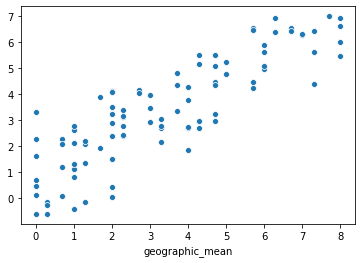

In [ ]:
y_pred = model_reg.predict(cohen_features)
sns.scatterplot(y, y_pred)

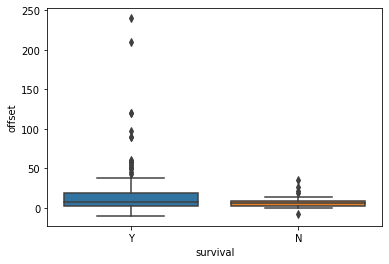

In [ ]:
sns.boxplot(x='survival', y='offset', data=cohen_all)

In [ ]:
sum(stanford_all['Lung Lesion'] == 1)

9186

In [ ]:
stanford_all

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

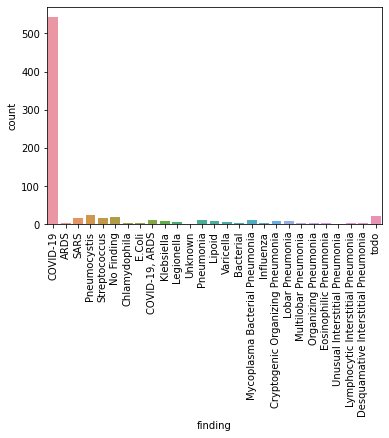

In [ ]:
sns.countplot(x='finding', data=cohen_all)
plt.xticks(rotation=90)

In [ ]:
cohen_all.finding.value_counts()

COVID-19                               543
Pneumocystis                            23
todo                                    22
No Finding                              18
Streptococcus                           17
SARS                                    16
Pneumonia                               12
COVID-19, ARDS                          12
Mycoplasma Bacterial Pneumonia          10
Cryptogenic Organizing Pneumonia         9
Lobar Pneumonia                          9
Lipoid                                   9
Klebsiella                               8
Varicella                                6
Legionella                               5
E.Coli                                   4
ARDS                                     4
Multilobar Pneumonia                     4
Bacterial                                4
Influenza                                4
Eosinophilic Pneumonia                   3
Chlamydophila                            3
Desquamative Interstitial Pneumonia      2
Organizing 

COVID-19                               543
Pneumocystis                            23
todo                                    22
No Finding                              18
Streptococcus                           17
SARS                                    16
Pneumonia                               12
COVID-19, ARDS                          12
Mycoplasma Bacterial Pneumonia          10
Cryptogenic Organizing Pneumonia         9
Lobar Pneumonia                          9
Lipoid                                   9
Klebsiella                               8
Varicella                                6
Legionella                               5
E.Coli                                   4
ARDS                                     4
Multilobar Pneumonia                     4
Bacterial                                4
Influenza                                4
Eosinophilic Pneumonia                   3
Chlamydophila                            3
Desquamative Interstitial Pneumonia      2
Organizing 

In [ ]:
non_covid_findings = ['ARDS',
                      'Bacterial',
                      'Chlamydophila',
                      'Cryptogenic Organizing Pneumonia',
                      'Desquamative Interstitial Pneumonia',
                      'E.Coli',
                      'Eosinophilic Pneumonia',
                      'Influenza',
                      'Klebsiella',
                      'Legionella',
                      'Lipoid',
                      'Lobar Pneumonia',
                      'Lymphocytic Interstitial Pneumonia',
                      'Multilobar Pneumonia',
                      'Mycoplasma Bacterial Pneumonia',
                      'No Finding',
                      'Organizing Pneumonia',
                      'Pneumocystis',
                      'Pneumonia',
                      'SARS',
                      'Streptococcus',
                      'Unusual Interstitial Pneumonia',
                      'Varicella']

folder_name_mapping = {'ARDS': 'ards',
                      'Bacterial': 'bacterial',
                      'Chlamydophila': 'chlamydophila',
                      'Cryptogenic Organizing Pneumonia': 'cryptogenic_organizing_pneumonia',
                      'Desquamative Interstitial Pneumonia': 'desquamative_interstitial_pneumonia',
                      'E.Coli': 'e_coli',
                      'Eosinophilic Pneumonia': 'eosinophilic_pneumonia',
                      'Influenza': 'influenza',
                      'Klebsiella': 'klebsiella',
                      'Legionella': 'legionella',
                      'Lipoid',
                      'Lobar Pneumonia',
                      'Lymphocytic Interstitial Pneumonia',
                      'Multilobar Pneumonia',
                      'Mycoplasma Bacterial Pneumonia',
                      'No Finding',
                      'Organizing Pneumonia',
                      'Pneumocystis',
                      'Pneumonia',
                      'SARS',
                      'Streptococcus',
                      'Unusual Interstitial Pneumonia',
                      'Varicella'}

{'ARDS',
 'Bacterial',
 'COVID-19',
 'COVID-19, ARDS',
 'Chlamydophila',
 'Cryptogenic Organizing Pneumonia',
 'Desquamative Interstitial Pneumonia',
 'E.Coli',
 'Eosinophilic Pneumonia',
 'Influenza',
 'Klebsiella',
 'Legionella',
 'Lipoid',
 'Lobar Pneumonia',
 'Lymphocytic Interstitial Pneumonia',
 'Multilobar Pneumonia',
 'Mycoplasma Bacterial Pneumonia',
 'No Finding',
 'Organizing Pneumonia',
 'Pneumocystis',
 'Pneumonia',
 'SARS',
 'Streptococcus',
 'Unknown',
 'Unusual Interstitial Pneumonia',
 'Varicella',
 'todo'}

In [ ]:
sars_subset = cohen_all[cohen_all.finding == 'SARS']
path_to_images = os.path.join('data', 'cohen_all')
filepaths = [os.path.join(path_to_images, f) for f in sars_subset.filename]

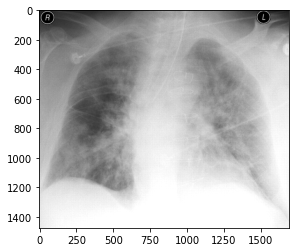

In [ ]:
from skimage import io
im = io.imread(filepaths[0])
plt.gray()
plt.imshow(im)

In [ ]:
import shutil

shutil.copy(filepaths[0], 'data/test_move')

'data/test_move/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg'

In [ ]:
import random
random.sample(filepaths, 2)

['data/cohen_all/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg',
 'data/cohen_all/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg']

In [ ]:
model_nb = naive_bayes.GaussianNB()
model_nb.fit(cohen_features, y)

In [ ]:
df_merged = pd.merge(cohen_all, cohen_severity, how='inner', on='filename')
len(df_merged)

94

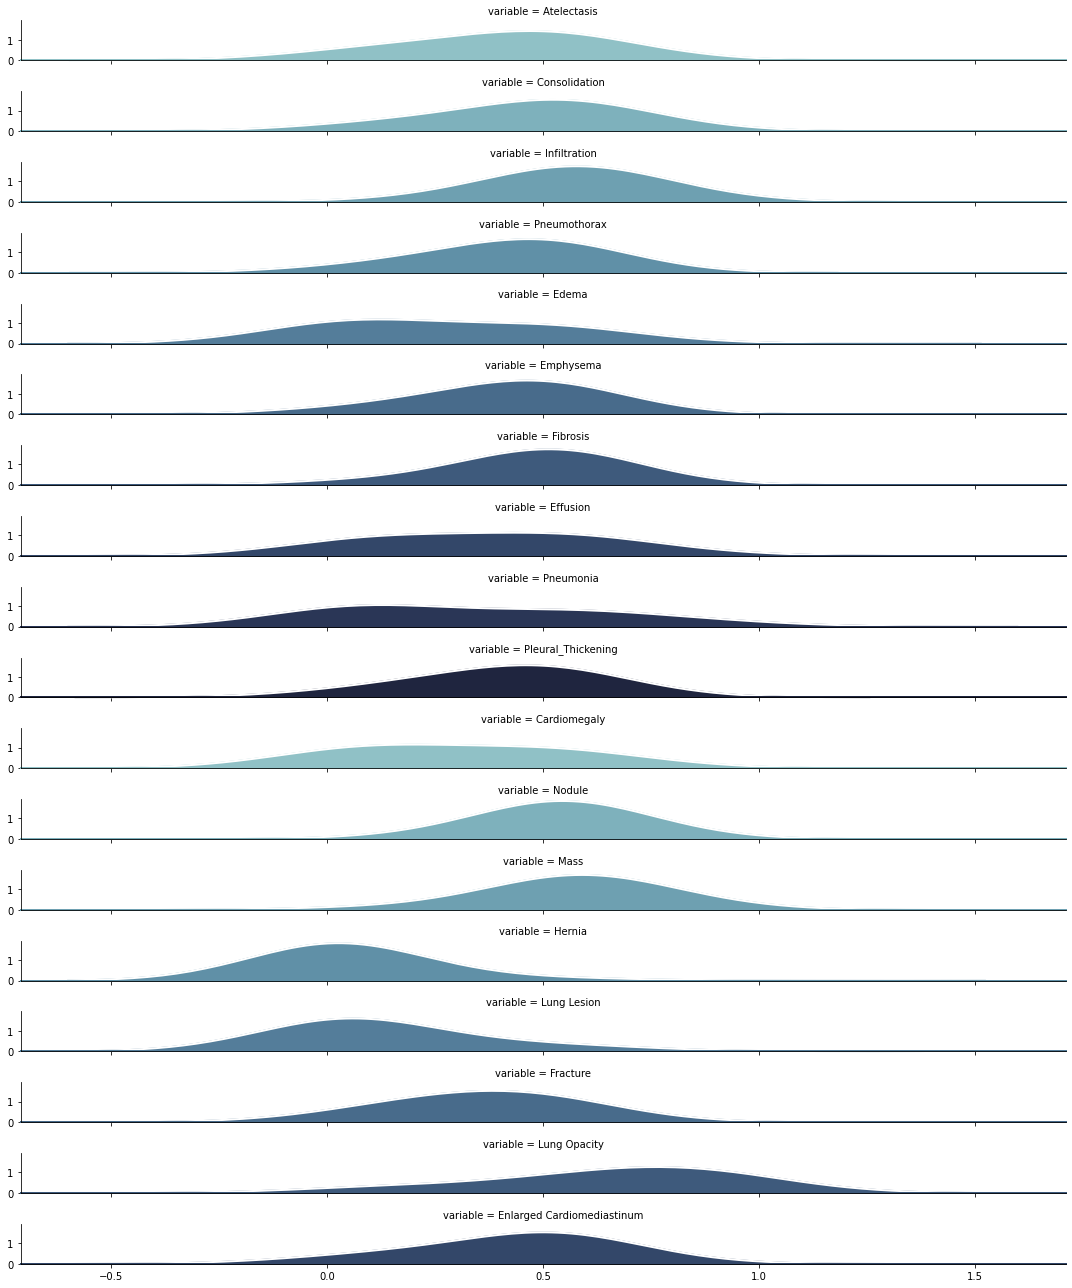

In [ ]:
cohen_features = cohen_predictions[feature_labels]

cohen_longform = pd.melt(cohen_features, value_vars=feature_labels)

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(cohen_longform, row='variable', hue='variable', aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

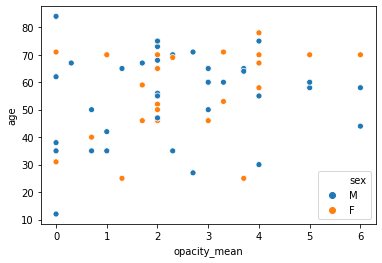

In [ ]:
sns.scatterplot(x='opacity_mean', y='age', hue='sex', data=df_merged)

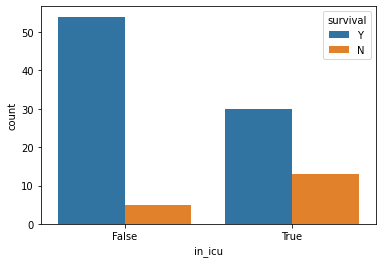

In [ ]:
sns.countplot(x='in_icu', hue='survival', data=df_subset)

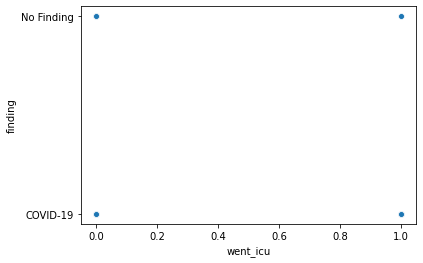

In [ ]:
sns.scatterplot(x='went_icu', y='finding', y_jitter=5, x_jitter=5, data=df_subset)

### Explore data!

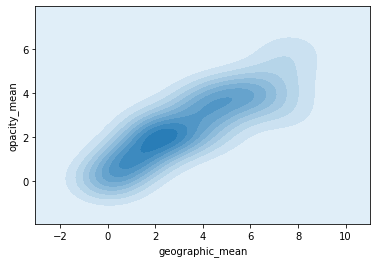

In [ ]:
sns.kdeplot(cohen_severity['geographic_mean'], cohen_severity['opacity_mean'], shade=True)

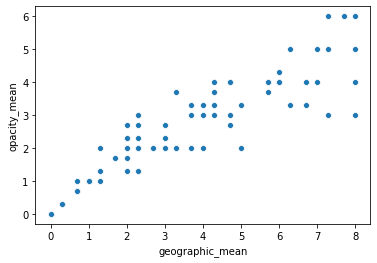

In [ ]:
sns.scatterplot(x='geographic_mean', y='opacity_mean', data=cohen_severity)

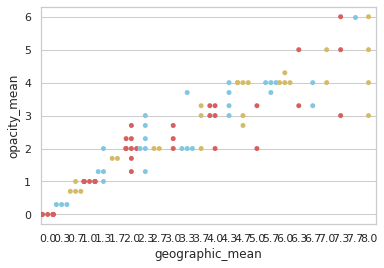

In [ ]:
# sns.set(style="whitegrid", palette="muted")

# # Load the example iris dataset
# iris = sns.load_dataset("iris")

# # "Melt" the dataset to "long-form" or "tidy" representation
# iris = pd.melt(iris, "species", var_name="measurement")

# # Draw a categorical scatterplot to show each observation
sns.swarmplot(x="geographic_mean", y="opacity_mean",
              palette=["r", "c", "y"], data=cohen_severity)

In [ ]:
metadata_subset = cohen_metadata[['offset', 'finding', 'age']]
metadata_subset = metadata_subset.dropna()

features = metadata_subset[['offset', 'age']]
labels = metadata_subset.finding


model = naive_bayes.GaussianNB()
model.fit(features, labels)
model.predict(features.iloc[1:3])